### Mini Project --- Earthquake

# Clustering data
Dataset from Kaggle : **"Earthquake Damage Prediction"**  
Source: https://www.drivendata.org/competitions/57/nepal-earthquake/data/ (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
raw_data = pd.read_csv('train_values.csv')
##setting building_id as the index for easy referencing
raw_data = raw_data.set_index('building_id')
y_train = pd.read_csv('train_labels.csv')
y_train = y_train.set_index('building_id')
y_train.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


#### Reading up the data types so we are able to sort it out in terms of categorial, numerical data

In [4]:
raw_data.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#### Checking for the number of values to ensure that there is no missing data

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

#### Damage_score calculations

In [6]:
variables_dropped = ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id', 'legal_ownership_status',
                    'count_families', 'has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']
score_calculation = pd.DataFrame(raw_data.drop(variables_dropped, axis=1))
## Converting remaining data as a category type data
#score_calculation = score_calculation.astype('category')
score_calculation.head()


,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2,30,6,5,t,r,n,f,q,t,...,1,0,0,0,0,0,0,0,0,0
28830,2,10,8,7,o,r,n,x,q,s,...,1,0,0,0,0,0,0,0,0,0
94947,2,10,5,5,t,r,n,f,x,t,...,1,0,0,0,0,0,0,0,0,0
590882,2,10,6,5,t,r,n,f,x,s,...,1,0,0,0,0,1,1,0,0,0
201944,3,30,8,9,t,r,n,f,x,s,...,0,0,0,0,0,0,0,0,0,0


### Converting the cateogrical into a rubricks, trying out for the variavle age

Ratioanle of this scoring system:
1. Assuming an equal earthquake throughout, a younger building , lower ```age``` will actually have a lower chance of it collapse, so the score it will get
2. Score a higher score system will mean it will have complete destruction given the fact that there is weaker
3. Summary: Lower Score ==  Stronger, higher score ==  Weaker

In [7]:
## Setting up of conditions for sorting, 10 grading system
#, 'count_floors_pre_eq', 'area_percentage','height_percentage']

    
age_conditions = [(score_calculation['age'] <= 20),
              (score_calculation['age'] <= 40) & (score_calculation['age'] > 20),
              (score_calculation['age'] <= 60) & (score_calculation['age'] > 40),
              (score_calculation['age'] <= 80) & (score_calculation['age'] > 60),
              (score_calculation['age'] <= 100) & (score_calculation['age'] > 80),
              (score_calculation['age'] <= 120) & (score_calculation['age'] > 100),
              (score_calculation['age'] <= 140) & (score_calculation['age'] > 120),
              (score_calculation['age'] <= 160) & (score_calculation['age'] > 140),
              (score_calculation['age'] <= 180) & (score_calculation['age'] > 160),
              (score_calculation['age'] <= 200) & (score_calculation['age'] > 180)]
age_score = [1,2,3,4,5,6,7,8,9,10]

count_floors_pre_eq_conditions = [(score_calculation['count_floors_pre_eq'] == 1),
                   (score_calculation['count_floors_pre_eq'] == 2),
                   (score_calculation['count_floors_pre_eq'] == 3),
                   (score_calculation['count_floors_pre_eq'] == 4),
                   (score_calculation['count_floors_pre_eq'] == 5),
                   (score_calculation['count_floors_pre_eq'] == 6),
                   (score_calculation['count_floors_pre_eq'] == 7),
                   (score_calculation['count_floors_pre_eq'] == 8),
                   (score_calculation['count_floors_pre_eq'] == 9)]
count_floors_pre_eq_score = [1,2,3,4,5,6,7,8,9]

area_percentage_score = [10,9,8,7,6,5,4,3,2,1]
area_percentage_conditions = [(score_calculation['area_percentage'] <=5),
                   (score_calculation['area_percentage'] <= 10) & (score_calculation['area_percentage'] >5),
                   (score_calculation['area_percentage'] <= 15) & (score_calculation['area_percentage'] >10),
                   (score_calculation['area_percentage'] <= 20) & (score_calculation['area_percentage'] >15),
                   (score_calculation['area_percentage'] <= 25) & (score_calculation['area_percentage'] >20),
                   (score_calculation['area_percentage'] <= 30) & (score_calculation['area_percentage'] >25),
                   (score_calculation['area_percentage'] <= 35) & (score_calculation['area_percentage'] >30),
                   (score_calculation['area_percentage'] <= 40) & (score_calculation['area_percentage'] >35),
                   (score_calculation['area_percentage'] <= 45) & (score_calculation['area_percentage'] >40),
                   (score_calculation['area_percentage'] <= 50) & (score_calculation['area_percentage'] >45)]

height_percentage_score = [1,2,3,4,5,6,7,8,9,10]
height_percentage_conditions = [(score_calculation['height_percentage'] <=3),
                     (score_calculation['height_percentage'] <= 6) & (score_calculation['height_percentage'] >3),
                     (score_calculation['height_percentage'] <= 9) & (score_calculation['height_percentage'] >6),
                     (score_calculation['height_percentage'] <= 12) & (score_calculation['height_percentage'] >9),
                     (score_calculation['height_percentage'] <= 15) & (score_calculation['height_percentage'] >12),
                     (score_calculation['height_percentage'] <= 18) & (score_calculation['height_percentage'] >15),
                     (score_calculation['height_percentage'] <= 21) & (score_calculation['height_percentage'] >18),
                     (score_calculation['height_percentage'] <= 24) & (score_calculation['height_percentage'] >21),
                     (score_calculation['height_percentage'] <= 27) & (score_calculation['height_percentage'] >24),
                     (score_calculation['height_percentage'] <= 31) & (score_calculation['height_percentage'] >27),]

original_columns= ['age','count_floors_pre_eq','area_percentage','height_percentage']
column_variables= ['age_score','count_floors_pre_eq_score','area_percentage_score','height_percentage_score']
condition_variables = [age_conditions,count_floors_pre_eq_conditions,area_percentage_conditions,height_percentage_conditions]
score_variables= [age_score,count_floors_pre_eq_score,area_percentage_score,height_percentage_score]

for count in range(4) :
    score_calculation[column_variables[count]] = np.select(condition_variables[count],score_variables[count])

score_calculation['total_score'] = pd.DataFrame(score_calculation[column_variables].sum(axis=1))
x_train = pd.DataFrame(score_calculation.drop(column_variables, axis=1))
x_train = pd.DataFrame(x_train.drop(original_columns, axis=1))
x_train.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,total_score
building_id,,,,,,,,,,,,,,,,,,,
802906,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,15
28830,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,15
94947,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,15
590882,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,14
201944,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,17


### To get dummy variables and columns --  prepartion for classificaition model

###### Converting columns with category values into dummies so that random forest can handle the data

data_convert = pd.get_dummies(data_drop, columns = ['Sex','Team','Sport', 'Year'], dummy_na = False)

In [8]:
categorical_variables = ['land_surface_condition', 'foundation_type',
                         'roof_type','ground_floor_type','other_floor_type',
                         'position', 'plan_configuration']
                         
x_train_convert = pd.get_dummies(x_train, columns = categorical_variables, dummy_na=False)
x_train_convert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   has_superstructure_adobe_mud            260601 non-null  int64
 1   has_superstructure_mud_mortar_stone     260601 non-null  int64
 2   has_superstructure_stone_flag           260601 non-null  int64
 3   has_superstructure_cement_mortar_stone  260601 non-null  int64
 4   has_superstructure_mud_mortar_brick     260601 non-null  int64
 5   has_superstructure_cement_mortar_brick  260601 non-null  int64
 6   has_superstructure_timber               260601 non-null  int64
 7   has_superstructure_bamboo               260601 non-null  int64
 8   has_superstructure_rc_non_engineered    260601 non-null  int64
 9   has_superstructure_rc_engineered        260601 non-null  int64
 10  has_superstructure_other                260601 non-null  int64


#### Application of Random Forest

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, random_state = 200, verbose=2, max_depth = 50)

# Train the model on training data
rf.fit(x_train_convert, np.ravel(y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 2000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building

building tree 322 of 2000
building tree 323 of 2000
building tree 324 of 2000
building tree 325 of 2000
building tree 326 of 2000
building tree 327 of 2000
building tree 328 of 2000
building tree 329 of 2000
building tree 330 of 2000
building tree 331 of 2000
building tree 332 of 2000
building tree 333 of 2000
building tree 334 of 2000
building tree 335 of 2000
building tree 336 of 2000
building tree 337 of 2000
building tree 338 of 2000
building tree 339 of 2000
building tree 340 of 2000
building tree 341 of 2000
building tree 342 of 2000
building tree 343 of 2000
building tree 344 of 2000
building tree 345 of 2000
building tree 346 of 2000
building tree 347 of 2000
building tree 348 of 2000
building tree 349 of 2000
building tree 350 of 2000
building tree 351 of 2000
building tree 352 of 2000
building tree 353 of 2000
building tree 354 of 2000
building tree 355 of 2000
building tree 356 of 2000
building tree 357 of 2000
building tree 358 of 2000
building tree 359 of 2000
building tre

building tree 638 of 2000
building tree 639 of 2000
building tree 640 of 2000
building tree 641 of 2000
building tree 642 of 2000
building tree 643 of 2000
building tree 644 of 2000
building tree 645 of 2000
building tree 646 of 2000
building tree 647 of 2000
building tree 648 of 2000
building tree 649 of 2000
building tree 650 of 2000
building tree 651 of 2000
building tree 652 of 2000
building tree 653 of 2000
building tree 654 of 2000
building tree 655 of 2000
building tree 656 of 2000
building tree 657 of 2000
building tree 658 of 2000
building tree 659 of 2000
building tree 660 of 2000
building tree 661 of 2000
building tree 662 of 2000
building tree 663 of 2000
building tree 664 of 2000
building tree 665 of 2000
building tree 666 of 2000
building tree 667 of 2000
building tree 668 of 2000
building tree 669 of 2000
building tree 670 of 2000
building tree 671 of 2000
building tree 672 of 2000
building tree 673 of 2000
building tree 674 of 2000
building tree 675 of 2000
building tre

building tree 954 of 2000
building tree 955 of 2000
building tree 956 of 2000
building tree 957 of 2000
building tree 958 of 2000
building tree 959 of 2000
building tree 960 of 2000
building tree 961 of 2000
building tree 962 of 2000
building tree 963 of 2000
building tree 964 of 2000
building tree 965 of 2000
building tree 966 of 2000
building tree 967 of 2000
building tree 968 of 2000
building tree 969 of 2000
building tree 970 of 2000
building tree 971 of 2000
building tree 972 of 2000
building tree 973 of 2000
building tree 974 of 2000
building tree 975 of 2000
building tree 976 of 2000
building tree 977 of 2000
building tree 978 of 2000
building tree 979 of 2000
building tree 980 of 2000
building tree 981 of 2000
building tree 982 of 2000
building tree 983 of 2000
building tree 984 of 2000
building tree 985 of 2000
building tree 986 of 2000
building tree 987 of 2000
building tree 988 of 2000
building tree 989 of 2000
building tree 990 of 2000
building tree 991 of 2000
building tre

building tree 1260 of 2000
building tree 1261 of 2000
building tree 1262 of 2000
building tree 1263 of 2000
building tree 1264 of 2000
building tree 1265 of 2000
building tree 1266 of 2000
building tree 1267 of 2000
building tree 1268 of 2000
building tree 1269 of 2000
building tree 1270 of 2000
building tree 1271 of 2000
building tree 1272 of 2000
building tree 1273 of 2000
building tree 1274 of 2000
building tree 1275 of 2000
building tree 1276 of 2000
building tree 1277 of 2000
building tree 1278 of 2000
building tree 1279 of 2000
building tree 1280 of 2000
building tree 1281 of 2000
building tree 1282 of 2000
building tree 1283 of 2000
building tree 1284 of 2000
building tree 1285 of 2000
building tree 1286 of 2000
building tree 1287 of 2000
building tree 1288 of 2000
building tree 1289 of 2000
building tree 1290 of 2000
building tree 1291 of 2000
building tree 1292 of 2000
building tree 1293 of 2000
building tree 1294 of 2000
building tree 1295 of 2000
building tree 1296 of 2000
b

building tree 1564 of 2000
building tree 1565 of 2000
building tree 1566 of 2000
building tree 1567 of 2000
building tree 1568 of 2000
building tree 1569 of 2000
building tree 1570 of 2000
building tree 1571 of 2000
building tree 1572 of 2000
building tree 1573 of 2000
building tree 1574 of 2000
building tree 1575 of 2000
building tree 1576 of 2000
building tree 1577 of 2000
building tree 1578 of 2000
building tree 1579 of 2000
building tree 1580 of 2000
building tree 1581 of 2000
building tree 1582 of 2000
building tree 1583 of 2000
building tree 1584 of 2000
building tree 1585 of 2000
building tree 1586 of 2000
building tree 1587 of 2000
building tree 1588 of 2000
building tree 1589 of 2000
building tree 1590 of 2000
building tree 1591 of 2000
building tree 1592 of 2000
building tree 1593 of 2000
building tree 1594 of 2000
building tree 1595 of 2000
building tree 1596 of 2000
building tree 1597 of 2000
building tree 1598 of 2000
building tree 1599 of 2000
building tree 1600 of 2000
b

building tree 1868 of 2000
building tree 1869 of 2000
building tree 1870 of 2000
building tree 1871 of 2000
building tree 1872 of 2000
building tree 1873 of 2000
building tree 1874 of 2000
building tree 1875 of 2000
building tree 1876 of 2000
building tree 1877 of 2000
building tree 1878 of 2000
building tree 1879 of 2000
building tree 1880 of 2000
building tree 1881 of 2000
building tree 1882 of 2000
building tree 1883 of 2000
building tree 1884 of 2000
building tree 1885 of 2000
building tree 1886 of 2000
building tree 1887 of 2000
building tree 1888 of 2000
building tree 1889 of 2000
building tree 1890 of 2000
building tree 1891 of 2000
building tree 1892 of 2000
building tree 1893 of 2000
building tree 1894 of 2000
building tree 1895 of 2000
building tree 1896 of 2000
building tree 1897 of 2000
building tree 1898 of 2000
building tree 1899 of 2000
building tree 1900 of 2000
building tree 1901 of 2000
building tree 1902 of 2000
building tree 1903 of 2000
building tree 1904 of 2000
b

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  9.5min finished


RandomForestClassifier(max_depth=50, n_estimators=2000, random_state=200,
                       verbose=2)

Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Classification Accuracy 	: 0.6380827395136627



[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.1min finished


<AxesSubplot:>

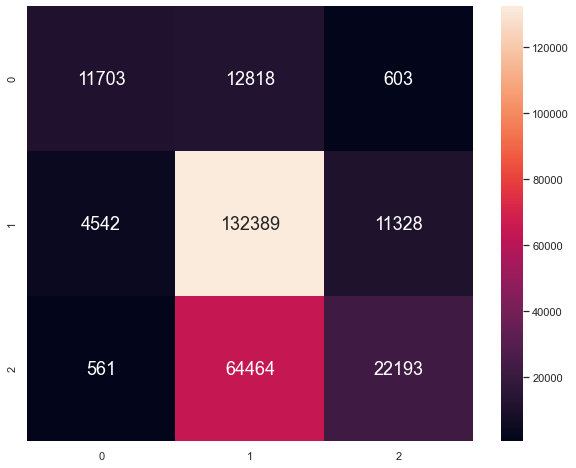

In [14]:
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(x_train_convert, np.ravel(y_train)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(figsize=(10, 8))
sb.heatmap(confusion_matrix(np.ravel(y_train), rf.predict(x_train_convert)),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [16]:
y_completed = pd.DataFrame(y_train)
y_completed['Predicted']= rf.predict(x_train_convert)
y_completed.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.1min finished


,damage_grade,Predicted
building_id,,
802906,3,2
28830,2,2
94947,3,3
590882,2,2
201944,3,2


In [17]:
y_completed.head(50)

,damage_grade,Predicted
building_id,,
802906,3,2
28830,2,2
94947,3,3
590882,2,2
201944,3,2
333020,2,2
728451,3,2
475515,1,2
441126,2,2
